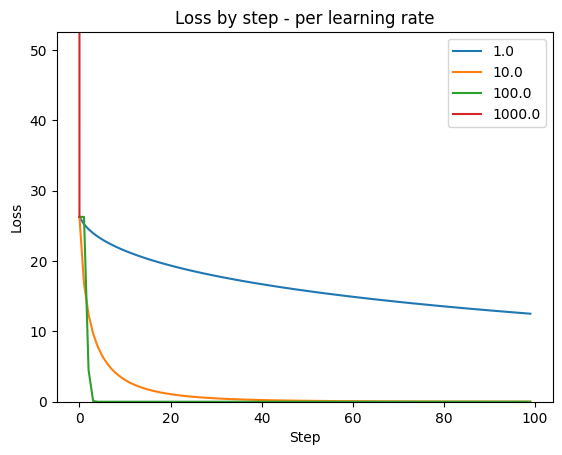

In [114]:
import torch
from matplotlib import pyplot as plt

from cs336_basics.training.optimizers.sgd import SGD

torch.manual_seed(0)

losses_by_lr = {}


initial_weights = 5 * torch.randn((10, 10))

lrs = [1e0, 1e1, 1e2, 1e3]

# lrs = 10 ** np.linspace(1.5, 2.9, num=20)

for lr in lrs:
    weights = torch.nn.Parameter(initial_weights.clone())
    opt = SGD([weights], lr=lr)

    losses = []

    for t in range(100):
        opt.zero_grad()  # Reset the gradients for all learnable parameters.
        loss = (weights**2).mean()  # Compute a scalar loss value.
        losses.append(loss.cpu().item())
        loss.backward()  # Run backward pass, which computes gradients.
        opt.step()  # Run optimizer step

    losses_by_lr[lr] = losses

plt.figure()
for lr, losses in losses_by_lr.items():
    plt.plot(losses, label=lr)

plt.title("Loss by step - per learning rate")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.ylim([0, losses[0] * 2])
plt.legend()